# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# Reading data file

In [134]:
df = pd.read_csv('day.csv')

In [135]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [136]:
df.shape

(730, 16)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [138]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [139]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [140]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [141]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [142]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [143]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [144]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [145]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [146]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [147]:
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

# Visualising the Data

In [148]:
#segrigating categorical,continuous,target columns
cat_cols = ['season','year','month','holiday','weekday','workingday','weathersit']
cont_cols= ['temp','atemp','humidity','windspeed']
target=['cnt']

In [149]:
len(cat_cols)+len(cont_cols)+len(target)

12

In [150]:
len(df.columns)

12

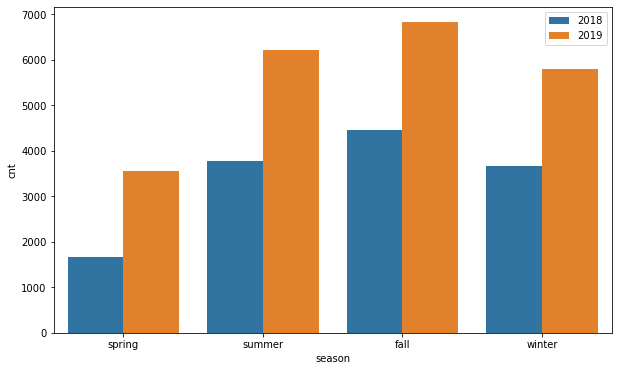

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(df['season'],df['cnt'],ci= None,hue=df['year'])
plt.legend(labels=['2018', '2019'])
plt.show()

* Surge in demand can be observed in summer,fall season
* Drastic increase in booking count from 2018 to 2019

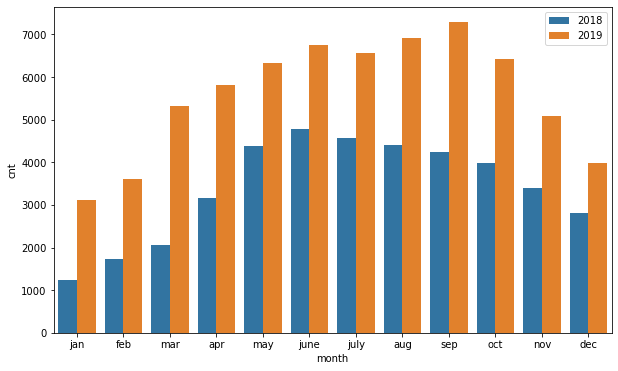

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(df['month'],df['cnt'],ci= None,hue=df['year'])
plt.legend(labels=['2018', '2019'])
plt.show()

* booking peaked in the month of September

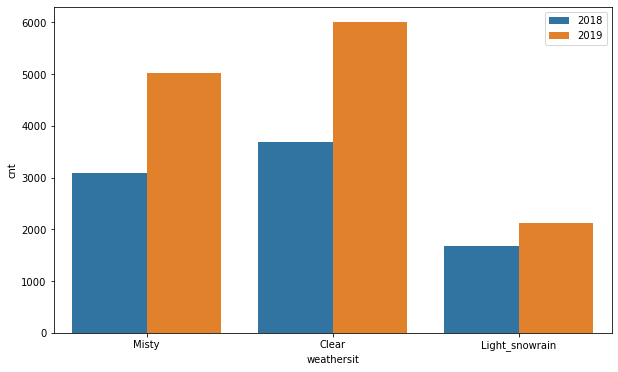

In [153]:
plt.figure(figsize=(10,6))
sns.barplot(df['weathersit'],df['cnt'],ci= None, hue=df['year'])
plt.legend(labels=['2018', '2019'])
plt.show()

* As expected, bookings are high when the weather is clear

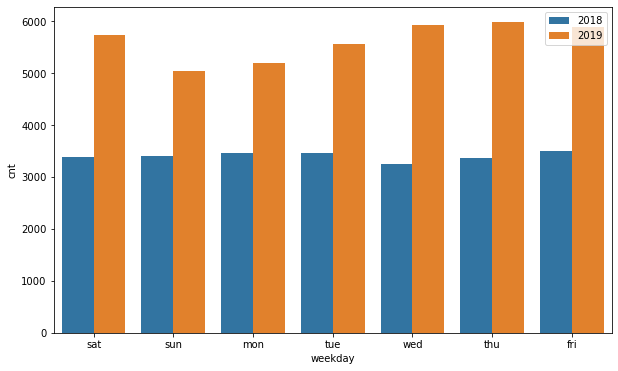

In [154]:
plt.figure(figsize=(10,6))
sns.barplot(df['weekday'],df['cnt'],ci= None, hue=df['year'])
plt.legend(labels=['2018', '2019'])
plt.show()

* Wednesday, Thursday, Friday, Saturday have more bookings than Sunday, Monday, Tuesday

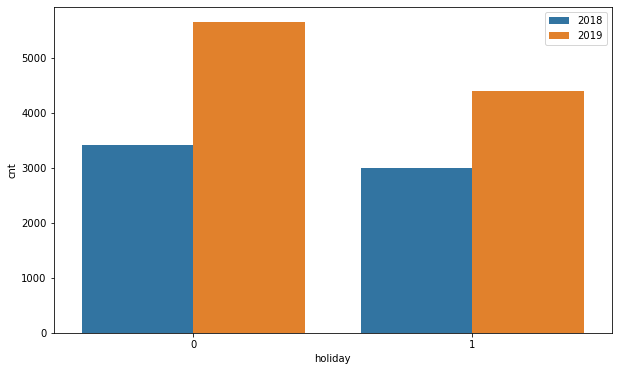

In [155]:
plt.figure(figsize=(10,6))
sns.barplot(df['holiday'],df['cnt'],ci= None, hue=df['year'])
plt.legend(labels=['2018', '2019'])
plt.show()

* more bookings are observed on non holidays

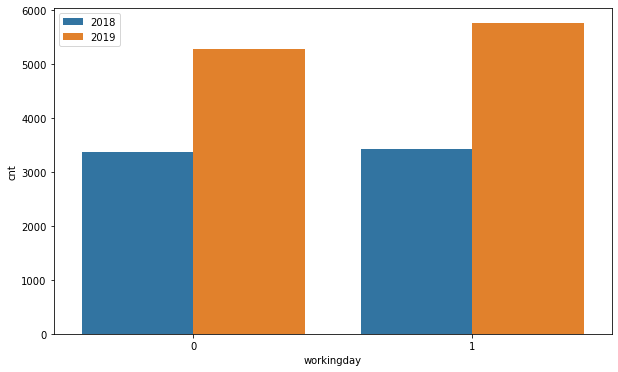

In [156]:
plt.figure(figsize=(10,6))
sns.barplot(df['workingday'],df['cnt'],ci= None, hue=df['year'])
plt.legend(labels=['2018', '2019'])
plt.show()

* more bookings are observed on working day

## Visualizing Continuous Columns

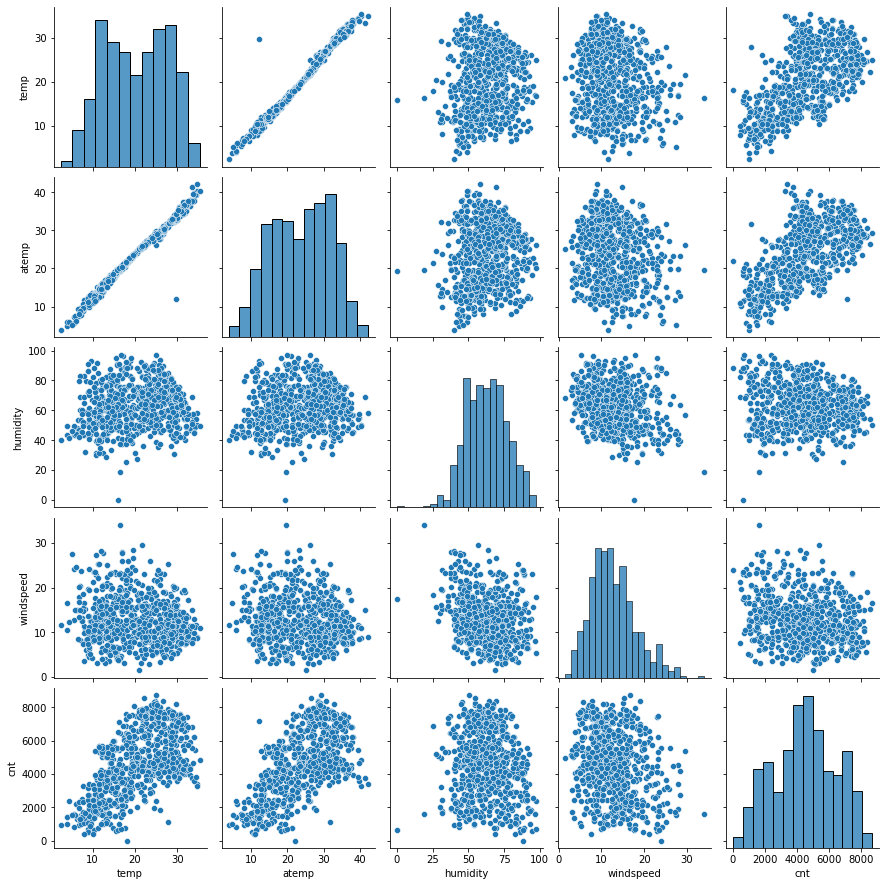

In [157]:
sns.pairplot(df[cont_cols+target])
plt.show()

* atemp and temp are linearly dependant

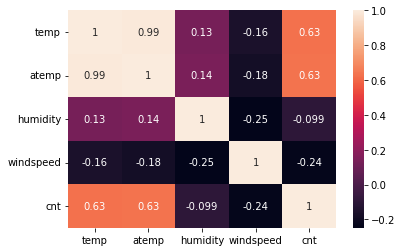

In [158]:
sns.heatmap(df[cont_cols+target].corr(),annot=True)
plt.show()

* atemp and temp are highly corelated

# Data Preparation

In [159]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [160]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [161]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [162]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [163]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


# Splitting the Data into Training and Testing Sets

In [164]:
X= df_new.drop(['cnt'],axis=1)
y=df_new['cnt']

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [166]:
X_train.shape

(511, 29)

In [167]:
X_test.shape

(219, 29)

# Scaling

In [168]:
X_train = (X_train-X_train.mean())/X_train.std()

In [169]:
X_test = (X_test-X_test.mean())/X_test.std()

In [170]:
X_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,0.981578,-0.16141,0.689888,-0.121872,-0.056549,-0.514471,-0.118194,-0.325351,-0.302821,-0.266720,...,-0.427215,-0.407849,-0.391406,2.549894,-0.433594,-0.173732,-0.724117,-0.565497,-0.571518,1.737154
576,0.981578,-0.16141,0.689888,1.231091,1.193288,0.516671,-0.331046,-0.325351,-0.302821,-0.266720,...,-0.427215,-0.407849,-0.391406,2.549894,-0.433594,-0.173732,-0.724117,-0.565497,-0.571518,-0.574528
426,0.981578,-0.16141,-1.446674,-0.420993,-0.349471,-0.069607,-0.386122,-0.325351,-0.302821,-0.266720,...,2.336162,-0.407849,-0.391406,-0.391406,-0.433594,-0.173732,1.378290,1.764897,-0.571518,-0.574528
728,0.981578,-0.16141,-1.446674,-1.295360,-1.473997,-1.044770,2.017592,-0.325351,3.295819,-0.266720,...,-0.427215,2.447092,-0.391406,-0.391406,-0.433594,-0.173732,-0.724117,1.764897,-0.571518,-0.574528
482,0.981578,-0.16141,-1.446674,-0.628079,-0.572085,-1.000578,-0.780297,-0.325351,-0.302821,-0.266720,...,2.336162,-0.407849,-0.391406,-0.391406,-0.433594,-0.173732,1.378290,-0.565497,1.746304,-0.574528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.981578,-0.16141,0.689888,1.447383,1.466650,0.201433,-0.788167,3.067592,-0.302821,-0.266720,...,-0.427215,-0.407849,2.549894,-0.391406,-0.433594,-0.173732,-0.724117,-0.565497,-0.571518,-0.574528
53,-1.016774,-0.16141,0.689888,-1.483637,-1.387290,-1.471059,-1.234769,-0.325351,-0.302821,3.741919,...,-0.427215,-0.407849,-0.391406,-0.391406,2.301793,-0.173732,-0.724117,1.764897,-0.571518,-0.574528
350,-1.016774,-0.16141,-1.446674,-1.281554,-1.364688,-0.496794,0.654163,-0.325351,3.295819,-0.266720,...,2.336162,-0.407849,-0.391406,-0.391406,-0.433594,-0.173732,1.378290,-0.565497,-0.571518,1.737154
79,-1.016774,-0.16141,0.689888,-0.331156,-0.372711,0.751586,1.232246,-0.325351,-0.302821,-0.266720,...,-0.427215,-0.407849,-0.391406,-0.391406,-0.433594,-0.173732,1.378290,-0.565497,1.746304,-0.574528


# Modeling

## Feature Selection

In [171]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector= RFE(estimator,n_features_to_select=10)

selector = selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True])

In [172]:
selected_feature = list(X_train.columns[selector.support_])
selected_feature

['year',
 'holiday',
 'workingday',
 'temp',
 'sat',
 'sun',
 'Light_snowrain',
 'Misty',
 'summer',
 'winter']

In [173]:
X_train = X_train[selected_feature]
X_test = X_test[selected_feature]

In [174]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [175]:
model1 = sm.OLS(y_train,X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.6
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.15e-174
Time:                        16:48:17   Log-Likelihood:                -4172.9
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     501   BIC:                             8408.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     38.050    118.036      0.000    4416.546    4566.061
year            1005.8106     38.399     26.194      0.000     930.368    1081.253
holiday         -115.2865     36.488     -3.160      0.002    -186.974     -43.599
workingday        63.7942     21.459      2.973      0.003      21.634     105.955
temp            1182.0261     39.716     29.762      0.000    1103.996    1260.056
sat               72.2174     28.668      2.519      0.012      15.894     128.541
sun             -107.9780     29.291     -3.686      0.000    -165.526     -50.430
Light_snowrain  -434.7326     38.830    -11.196      0.000    -511.022    -358.443
Misty           -306.7744     38.754     -7.916      0.000    -382.915    -230.633
summer           255.9121     40.506      6.318      0.000     176.329     335.495
winter           514.0889     41.498     12.388      0.000     432.558     595.620
==============================================================================
Omnibus:                       59.857   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.317
Skew:                          -0.608   Prob(JB):                     1.02e-32
Kurtosis:                       5.333   Cond. No.                     2.93e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,year,1.016410
2,holiday,inf
3,workingday,inf
4,temp,1.087326
5,sat,inf
6,sun,inf
7,Light_snowrain,1.039362
8,Misty,1.035323
9,summer,1.131048


Dropping 'holiday' as its VIF is high

In [177]:
X_train_sm = X_train_sm.drop(['holiday'],axis=1)
X_test_sm = X_test_sm.drop(['holiday'],axis=1)

In [178]:
model2 = sm.OLS(y_train,X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.6
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.15e-174
Time:                        16:48:21   Log-Likelihood:                -4172.9
No. Observations:                 511   AIC:                             8366.
Df Residuals:                     501   BIC:                             8408.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     38.050    118.036      0.000    4416.546    4566.061
year            1005.8106     38.399     26.194      0.000     930.368    1081.253
workingday       406.1456    114.496      3.547      0.000     181.193     631.098
temp            1182.0261     39.716     29.762      0.000    1103.996    1260.056
sat              336.9134     93.549      3.601      0.000     153.117     520.710
sun              148.2288     90.973      1.629      0.104     -30.506     326.963
Light_snowrain  -434.7326     38.830    -11.196      0.000    -511.022    -358.443
Misty           -306.7744     38.754     -7.916      0.000    -382.915    -230.633
summer           255.9121     40.506      6.318      0.000     176.329     335.495
winter           514.0889     41.498     12.388      0.000     432.558     595.620
==============================================================================
Omnibus:                       59.857   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.317
Skew:                          -0.608   Prob(JB):                     1.02e-32
Kurtosis:                       5.333   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Dropping 'Sun' as its P value is high

In [179]:
X_train_sm = X_train_sm.drop(['sun'],axis=1)
X_test_sm = X_test_sm.drop(['sun'],axis=1)

In [180]:
model3 = sm.OLS(y_train,X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          9.23e-175
Time:                        16:48:23   Log-Likelihood:                -4174.3
No. Observations:                 511   AIC:                             8367.
Df Residuals:                     502   BIC:                             8405.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4491.3033     38.113    117.842      0.000    4416.423    4566.184
year            1006.3616     38.460     26.166      0.000     930.798    1081.925
workingday       237.4175     48.928      4.852      0.000     141.289     333.546
temp            1185.0512     39.738     29.822      0.000    1106.979    1263.124
sat              206.7184     48.728      4.242      0.000     110.982     302.455
Light_snowrain  -433.4482     38.886    -11.147      0.000    -509.847    -357.049
Misty           -305.3187     38.808     -7.867      0.000    -381.565    -229.073
summer           258.6369     40.538      6.380      0.000     178.991     338.283
winter           513.4442     41.564     12.353      0.000     431.783     595.105
==============================================================================
Omnibus:                       60.771   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.233
Skew:                          -0.613   Prob(JB):                     1.45e-33
Kurtosis:                       5.366   Cond. No.                         2.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## * We can consider the above model res3, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.


## * F-Statistics value of 265.0 (which is greater than 1) and the p-value of 9.23e-175vi.e almost equals to zero, states that the overall model is significant

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train_sm.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))] 
vif_data

,Feature,VIF
0,const,1.000000
1,year,1.016331
2,workingday,1.644816
3,temp,1.084950
4,sat,1.631421
5,Light_snowrain,1.038934
6,Misty,1.034773
7,summer,1.129121
8,winter,1.186978


In [187]:
predicted_value = res3.predict(X_test_sm)

In [188]:
from sklearn.metrics import r2_score 
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 79.06 %


## Conclusion: Demand of bikes depend on year, workingday, temp, sat, Light_snowrain, Misty, summer and winter.